<a href="https://colab.research.google.com/github/chernoskutov1989dv/Object-detection-using-VGG16-neural-network/blob/main/object_detection_using_vgg16_neural_network_with_df_and_resize_function_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from google.colab import files
from io import BytesIO
from PIL import Image
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2

In [3]:
from tensorflow.keras.preprocessing import image as kp_image

In [4]:
model = keras.applications.VGG16()


553467096/553467096 [==============================] - 3s 0us/step


In [5]:
uploaded = files.upload()

Saving train.jpg to train (1).jpg


In [6]:
img = Image.open(BytesIO(uploaded['train.jpg']))

In [7]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import cv2


In [9]:
img = np.array(img)

Применим функцию resize для уменьшения разрешения изображения до 224*224 пикселей. Это необходимо для обработки данных с использованием сети VGG16

In [10]:
img = cv2.resize(img, (224, 224))


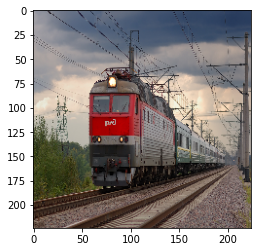

In [11]:
plt.imshow( img )

In [12]:
img = np.array(img)

In [13]:
x = keras.applications.vgg16.preprocess_input(img)
print(x.shape)

(224, 224, 3)


In [14]:
x = np.expand_dims(x, axis=0)

print(x.shape)

(1, 224, 224, 3)


Прогоняем через сеть, делаем предсказание

In [15]:
res = model.predict( x )
print(np.argmax(res))

1/1 [==============================] - 1s 1s/step
547


Доработаем программу для автоматического определения объекта по полученному индексу.

In [16]:
result = (np.argmax(res))

In [17]:
print (result)

547


Подключаем библиотеку pandas для работы с датасетом, в который мы поместили индексы и описание объектов. Исходный файл находится в:  https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('ds2.csv')

Через df.loc [в качестве индекса указываем переменную result] выводим имя (имена) предсказанного объекта

In [20]:
df.loc[result]

;Name;Name2;Name3;Name4;;;;;;    547; electric locomotive;;;;;;;;;
Name: 547, dtype: object